<p><a href="https://colab.research.google.com/github/gdsaxton/GDAN5400/blob/main/Week%205%20Notebooks/GDAN%205400%20-%20Week%205%20Class%20Notebook.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab" /></a></p>

# Week 5: Introduction to Univariate Statistics & Visualization in Python
- Lesson Objectives – By the end of this session, students will:
  - Understand the concept and application of key univariate statistics (mean, median, mode, variance, standard deviation).
  - Understand the purpose and importance of data visualization in analytics.
  - Learn how to use Matplotlib and Seaborn to create meaningful visualizations.
  - Apply various types of plots (e.g., histograms, boxplots, bar charts, count plots, pie graphs).
  - Visualize distributions using histograms and overlay trend curves to identify patterns.
  - Practice customizing visualizations for clarity and insight.

---

## **Dataset**
We will use the following accounting-specific dataset, created for this session. This dataset simulates financial transactions for 20 clients. It includes details like transaction amounts, client industries, invoice status, and payment delays.

In [265]:
import pandas as pd

# Create test dataset
data = {
    'Client_ID': range(1, 21),
    'Industry': ['Retail', 'Manufacturing', 'Tech', 'Finance'] * 5,
    'Transaction_Amount': [1500, 2000, 3500, 4000, 4500, 800, 1200, 3000, 700, 2200,
                           1800, 2500, 4000, 3700, 3200, 500, 2100, 2900, 3600, 3300],
    'Invoice_Status': ['Paid', 'Unpaid', 'Paid', 'Unpaid', 'Paid'] * 4,
    'Payment_Delay_Days': [0, 15, 0, 30, 0, 45, 60, 0, 10, 0, 20, 0, 5, 25, 0, 35, 50, 0, 40, 0],
    'Zip_Code': [10001, 10002, 10003, 10004, 10005] * 4,
    'Region': ['North', 'East', 'West', 'South', 'Central'] * 4,
    'Currency': ['USD'] * 20,
    'Transaction_Date': pd.date_range(start='2023-01-01', periods=20).astype(str),
    'Tax_Percentage': [5, 8, 10, 7, 6, 4, 5, 9, 6, 7, 5, 10, 8, 7, 6, 9, 4, 7, 5, 6]
}
# I am converting `Transaction_Date` to `str` format in the following code block so that we can convert it to `datetime`

df = pd.DataFrame(data)
df

,Client_ID,Industry,Transaction_Amount,Invoice_Status,Payment_Delay_Days,Zip_Code,Region,Currency,Transaction_Date,Tax_Percentage
0,1,Retail,1500,Paid,0,10001,North,USD,2023-01-01,5
1,2,Manufacturing,2000,Unpaid,15,10002,East,USD,2023-01-02,8
2,3,Tech,3500,Paid,0,10003,West,USD,2023-01-03,10
3,4,Finance,4000,Unpaid,30,10004,South,USD,2023-01-04,7
4,5,Retail,4500,Paid,0,10005,Central,USD,2023-01-05,6
5,6,Manufacturing,800,Paid,45,10001,North,USD,2023-01-06,4
6,7,Tech,1200,Unpaid,60,10002,East,USD,2023-01-07,5
7,8,Finance,3000,Paid,0,10003,West,USD,2023-01-08,9
8,9,Retail,700,Unpaid,10,10004,South,USD,2023-01-09,6
9,10,Manufacturing,2200,Paid,0,10005,Central,USD,2023-01-10,7


### Warm-Up – Small-Group Coding Challenge #1

  - Define and use a function to convert Celsius to Fahrenheit 
  - Add 32 to the temperature in Celsius*(9/5)

In [ ]:
#Fill in the ellipses (...) here with the elements of the function
def ...:
    return ...

In [ ]:
#Apply the function to convert 25 degrees Celsius to Fahrenheit (fill in the ellipses)
...(...)

# Intro to Univariate Statistics in Data Analytics



### Category 1. Identifying Central Tendencies
Univariate statistics help pinpoint the **"center" of a dataset** using measures like:
- **Mean (Average)** – The arithmetic average of all values.
- **Median** – The middle value, which is useful for skewed data.
- **Mode** – The most frequently occurring value.

For example, in an **insurance claims dataset**, knowing the **median claim amount** helps companies set expectations for typical payouts.

### Category 2. Measuring Variability
Understanding how **spread out** data is can reveal patterns or inconsistencies:
- **Minimum & Maximum** – The smallest and largest values, helping to spot outliers.
- **Range** – The difference between max and min values, showing data dispersion.
- **Variance & Standard Deviation** – Indicate how much individual values deviate from the mean.

For instance, an **insurance company** may analyze the **standard deviation of repair costs** to assess risk and pricing strategies.

---

###  Summary of Different Univariate Statistics Using `Transaction_Amount` 

Let's analyze `Transaction_Amount` using different univariate statistics.

In [272]:
# Calculate basic statistics for Transaction_Amount
mean_value = df['Transaction_Amount'].mean()
median_value = df['Transaction_Amount'].median()
mode_value = df['Transaction_Amount'].mode()[0]
std_dev = df['Transaction_Amount'].std()
variance = df['Transaction_Amount'].var()

print(f"Mean: ${mean_value:.2f}")
print(f"Median: ${median_value:.2f}")
print(f"Mode: ${mode_value}")
print(f"Standard Deviation: ${std_dev:.2f}")
print(f"Variance: ${variance:.2f}")

Mean: $2550.00
Median: $2700.00
Mode: $4000
Standard Deviation: $1201.97
Variance: $1444736.84


###  Summary of Different Univariate Statistics Using `Transaction_Amount` 

| **Statistic**  | **Definition** | **Use in Accounting & Analytics** |
|---------------|---------------|------------------------------------|
| **Mean (Average)** | The sum of all values divided by the count. | Helps calculate the **average transaction size** for businesses to assess revenue trends. |
| **Median** | The middle value when data is sorted. | Useful for **skewed distributions**, such as analyzing **typical customer purchases**. |
| **Mode** | The most frequently occurring value. | Identifies the **most common transaction amount**, helping businesses understand standard pricing or common purchase sizes. |
| **Minimum (Min)** | The smallest value in the dataset. | Useful for detecting **small or micro-transactions** that might indicate discounts or rounding adjustments. |
| **Maximum (Max)** | The largest value in the dataset. | Helps flag **exceptionally large transactions**, which could indicate bulk purchases or financial fraud. |
| **Range** | Difference between max and min values. | Shows the **spread of transaction amounts**, helping identify customer segmentation. |
| **Variance** | The average squared deviation from the mean. | Helps quantify **fluctuations in transaction sizes**, useful for risk assessment in financial planning. |
| **Standard Deviation (Std Dev)** | The square root of variance, measuring spread. | Important for **measuring transaction volatility**, such as identifying high-risk clients or market trends. |

---


# Levels of Analysis and `groupby()`
As a review of `groupby()`, let's aggregate our *transaction-level* dataframe up to the `Industry` level.

Returns a `Series`, not a `DataFrame`.

In [273]:
mean_sales_by_industry = df.groupby('Industry')['Transaction_Amount'].mean()
mean_sales_by_industry

Industry
Finance          2660.0
Manufacturing    2320.0
Retail           2560.0
Tech             2660.0
Name: Transaction_Amount, dtype: float64

If you need a DataFrame, you can convert it with `.to_frame()`:

In [274]:
mean_sales_by_industry = mean_sales_by_industry.to_frame()
mean_sales_by_industry

,Transaction_Amount
Industry,
Finance,2660.0
Manufacturing,2320.0
Retail,2560.0
Tech,2660.0


The following code returns a `DataFrame` because `.groupby().mean()` is applied to a subset of df that includes both `Industry` and `Transaction_Amount`.

The result will have `Industry` as the index and `Transaction_Amount` as a column.

In [275]:
mean_sales_by_industry = df[['Industry', 'Transaction_Amount']].groupby('Industry').mean()
mean_sales_by_industry

,Transaction_Amount
Industry,
Finance,2660.0
Manufacturing,2320.0
Retail,2560.0
Tech,2660.0


This approach is useful if you want to aggregate multiple columns of our data.

In [276]:
industry_means = df[['Industry', 'Transaction_Amount', 'Payment_Delay_Days', 'Tax_Percentage']].groupby('Industry').mean()
industry_means

,Transaction_Amount,Payment_Delay_Days,Tax_Percentage
Industry,,,
Finance,2660.0,13.0,8.2
Manufacturing,2320.0,17.0,6.6
Retail,2560.0,13.0,5.8
Tech,2660.0,24.0,6.2


#### Key Takeaway:
- Use the first approach if you're working with just one column and are fine with a `Series` (or convert it to a `DataFrame` if needed).
- Use the second approach if you want the result as a `DataFrame` and might include multiple numeric columns.

### Small-Group Coding Challenge #2

- Aggregate `Transaction_Amount` by `Region` and calculate the average for each region.
- Save the results in a series called `avg_amount_by_region`
- Bonus: sort the series in descending order.

In [ ]:
avg_amount_by_region = ...

Now we can do the same thing for other aggregation functions:

### **Popular `groupby()` Functions in Pandas**

- **`.count()`** – Counts the number of non-null values in each group.
- **`.sum()`** – Computes the sum of values for each group.
- **`.mean()`** – Calculates the average value for each group.
- **`.median()`** – Finds the median (middle) value in each group.
- **`.min()`** – Returns the smallest value in each group.
- **`.max()`** – Returns the largest value in each group.
- **`.std()`** – Computes the standard deviation for each group.
- **`.var()`** – Calculates the variance for each group.
- **`.agg()`** – Allows multiple aggregation functions at once.
- **`.size()`** – Returns the size (number of rows) in each group, including nulls.
- **`.first()`** – Returns the first value in each group.
- **`.last()`** – Returns the last value in each group.
- **`.nunique()`** – Counts the number of unique values in each group.
- **`.apply()`** – Applies a custom function to each group.


Region
Central    13200
East        7800
North       4600
South      12000
West       13400
Name: Transaction_Amount, dtype: int64

<br>Here is an example using `agg()`, which is slightly more complicated. 

In [281]:
df.groupby('Industry').agg({'Transaction_Amount': 'sum', 'Payment_Delay_Days': 'mean'})

,Transaction_Amount,Payment_Delay_Days
Industry,,
Finance,13300,13.0
Manufacturing,11600,17.0
Retail,12800,13.0
Tech,13300,24.0


<br>To rename the columns you have two main options

**Option 1**: Create dataframe then rename columns

In [282]:
df_grouped = df.groupby('Industry').agg({'Transaction_Amount': 'sum', 'Payment_Delay_Days': 'mean'})
df_grouped.columns = ['Total_Transaction_Amount', 'Avg_Payment_Delay']
df_grouped

,Total_Transaction_Amount,Avg_Payment_Delay
Industry,,
Finance,13300,13.0
Manufacturing,11600,17.0
Retail,12800,13.0
Tech,13300,24.0



**Option 2**: Use `method chaining`

In [283]:
df_grouped = df.groupby('Industry').agg({'Transaction_Amount': 'sum', 'Payment_Delay_Days': 'mean'}).rename(columns={'Transaction_Amount': 'Total_Transaction_Amount', 'Payment_Delay_Days': 'Avg_Payment_Delay'})
df_grouped

,Total_Transaction_Amount,Avg_Payment_Delay
Industry,,
Finance,13300,13.0
Manufacturing,11600,17.0
Retail,12800,13.0
Tech,13300,24.0


#### What is Method Chaining?
- It allows you to apply multiple operations sequentially on a DataFrame without creating intermediate variables.
- Each method returns a new DataFrame, which is immediately passed to the next method.
- It improves readability and keeps code concise.

---

#### ✅ **When to Use Method Chaining**
- ✔ When applying **multiple transformations** step by step.
- ✔ When avoiding **temporary DataFrame assignments**.
- ✔ When **readability** is a priority (but keep it short to avoid complexity).
- ✔ When working with **data cleaning and transformation pipelines**.

---

#### ❌ **When to Avoid Method Chaining**
- ❌ When **debugging complex operations** (it's harder to inspect intermediate results).
- ❌ When the **pipeline becomes too long** (consider breaking into logical steps).
- ❌ When methods depend on **sequential logic** that needs manual intervention.
- ❌ When chaining reduces **code clarity**, making it difficult for others to understand.


# Data Visualization

### Setting up Environment for Plotting

In [284]:
# Import plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set a consistent style for the plots
sns.set(style="whitegrid")

# Histogram
Let's explore plotting in Matplotlib & Seaborn by first generating the histogram without any customization and then refining the figure. 

<Axes: xlabel='Transaction_Amount', ylabel='Count'>

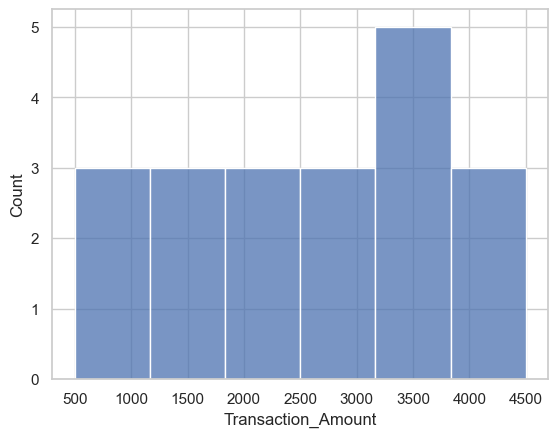

In [285]:
sns.histplot(df['Transaction_Amount'])

## **Explanation of Matplotlib Styling Options**

When creating visualizations with Matplotlib, you can customize such elements as **figure size**, **titles**, **axis labels**, and **padding** to improve readability and presentation. Below is an explanation of some key options we will use in the code:

---

### Change Figure Size
We will add this line to our code block: `plt.figure(figsize=(8, 5))`
- **What it does**: Sets the **size of the figure** (width, height) in inches.
- **Why it's useful**: Ensures that plots are large enough for readability and professional presentation.

**Example:**
```python
plt.figure(figsize=(10, 6))  # Creates a wider figure


<Axes: xlabel='Transaction_Amount', ylabel='Count'>

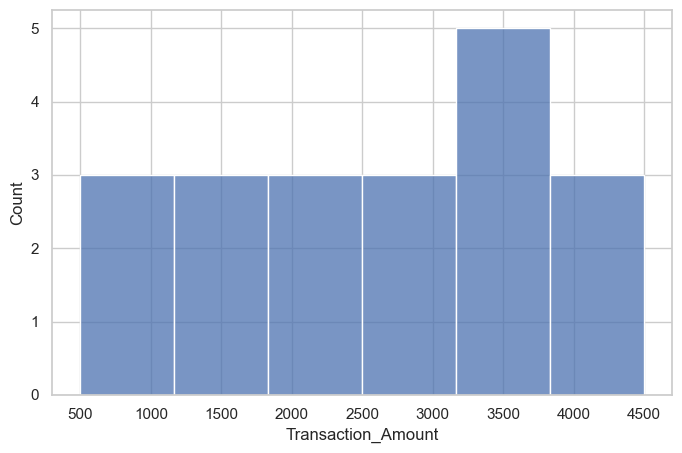

In [286]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Transaction_Amount'])

### Add a Title 
We will add this line to our code block: `plt.title("Distribution of Transaction Amounts", fontsize=14, pad=20)`
- **What it does**: Adds a **title** to the plot.
- **Parameters**:
  - `fontsize=14` → Sets the font size of the title.
  - `pad=20` → Adds **extra spacing (padding)** between the title and the plot.

**Why it's useful**:
- Improves **clarity** and makes the visualization **easier to interpret**.
- The `pad` parameter prevents the title from being too close to the plot.

Text(0.5, 1.0, 'Distribution of Transaction Amounts')

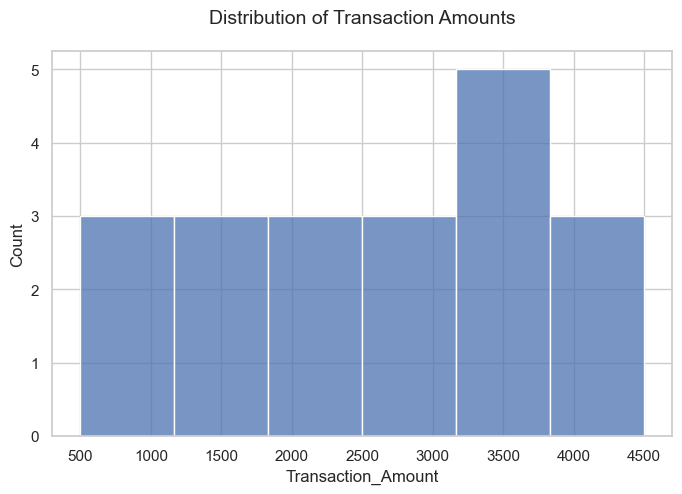

In [287]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Transaction_Amount'])
plt.title("Distribution of Transaction Amounts", fontsize=14, pad=20)

### Add x-axis label
We will add this line to our code block: `plt.xlabel("Transaction Amount ($)", fontsize=12, labelpad=15)`
- **What it does**: Labels the **x-axis**.
- **Parameters**:
  - `fontsize=12` → Sets the font size for the x-axis label.
  - `labelpad=15` → Adds **extra space** between the label and the axis.

**Why it's useful**:
- Makes axis labels **clearer** and prevents overlapping with tick marks.
- Helps viewers understand the meaning of the horizontal axis.

Text(0.5, 0, 'Transaction Amount ($)')

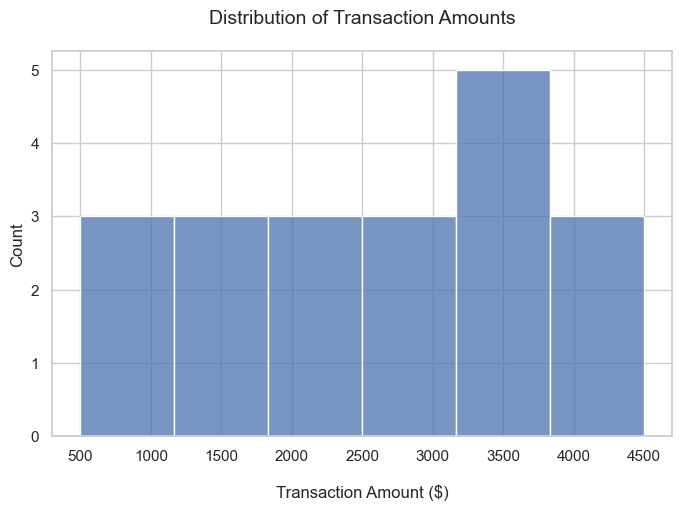

In [288]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Transaction_Amount'])
plt.title("Distribution of Transaction Amounts", fontsize=14, pad=20)
plt.xlabel("Transaction Amount ($)", fontsize=12, labelpad=15)

### Add y-axis label 
We will add this line to our code block: `plt.ylabel("Frequency", fontsize=12, labelpad=15)`
- **What it does**: Labels the **y-axis**.
- **Parameters**:
  - `fontsize=12` → Sets the font size for the y-axis label.
  - `labelpad=15` → Adds **extra space** between the label and the axis.

**Why it's useful**:
- Enhances readability by ensuring the label is not too close to the axis.
- Clearly indicates what the y-axis represents in the visualization.

Text(0, 0.5, 'Frequency')

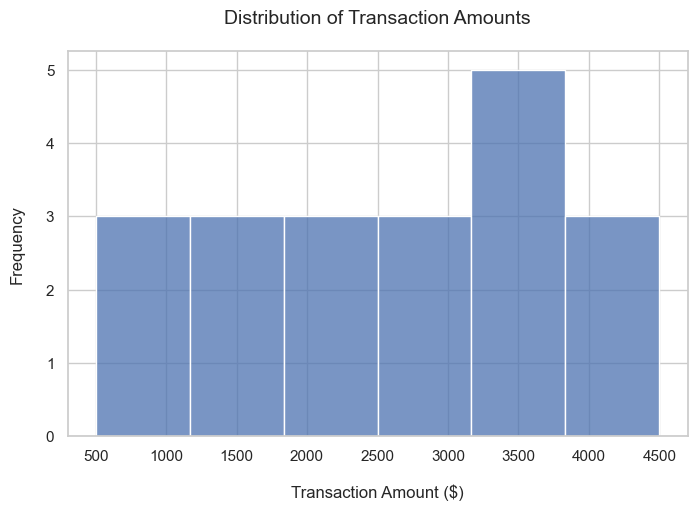

In [289]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Transaction_Amount'])
plt.title("Distribution of Transaction Amounts", fontsize=14, pad=20)
plt.xlabel("Transaction Amount ($)", fontsize=12, labelpad=15)
plt.ylabel("Frequency", fontsize=12, labelpad=15)

### Add `plt.show()`
- **What it does**: Displays the plot in an interactive environment (e.g., Jupyter Notebook, Colab, or Python script).
- **How it works**:
  - Ensures the figure is rendered properly when multiple plots exist in a script.
  - Prevents unnecessary outputs when running a visualization cell.

**Why it's useful**:
- Essential in **Jupyter Notebooks** and **Google Colab** to ensure only the final figure is displayed.
- Helps in debugging by separating multiple plot outputs.

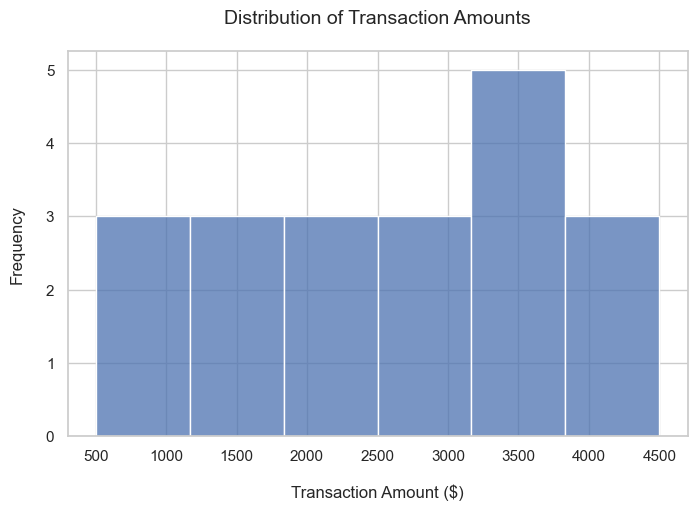

In [290]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Transaction_Amount'])
plt.title("Distribution of Transaction Amounts", fontsize=14, pad=20)
plt.xlabel("Transaction Amount ($)", fontsize=12, labelpad=15)
plt.ylabel("Frequency", fontsize=12, labelpad=15)
plt.show()

### **Summary Table: Explanation of Common `matplotlib` Customization Options**

| **Option** | **What it Does** | **Key Parameters** | **Why It's Useful** |
|------------|-----------------|--------------------|----------------------|
| `plt.figure(figsize=(8, 5))` | Sets the figure size. | `figsize=(width, height)` | Adjusts the **plot dimensions** for better readability. |
| `plt.title("Title", fontsize=14, pad=20)` | Adds a title to the plot. | `fontsize`, `pad` | Makes the plot **more informative**, and `pad` prevents overlap. |
| `plt.xlabel("X-Axis Label", fontsize=12, labelpad=15)` | Labels the x-axis. | `fontsize`, `labelpad` | Ensures the x-axis is **clearly labeled** and spaced properly. |
| `plt.ylabel("Y-Axis Label", fontsize=12, labelpad=15)` | Labels the y-axis. | `fontsize`, `labelpad` | Helps interpret the **y-axis meaning** clearly. |
| `plt.show()` | Displays the plot. | None | **Ensures proper rendering** of the visualization, especially in notebooks. |



### Next, we will change some options specifically for histograms

Specifically, we will set the number of 'bins' (bars) we want to see, add a kernel density (kde) line, change the color of the bars, and add an outline around the edges of the bars:

```python
bins=10, kde=True, color='blue', edgecolor='black')
```

---

### Side Note: What is the KDE Line in `sns.histplot()`?

Only read if you are interested in learning the technical details of the KDE line. 

In **Seaborn's** `sns.histplot()`, the `kde=True` parameter adds a **Kernel Density Estimate (KDE) line** over the histogram. 

#### **📌 What is KDE?**
- **KDE (Kernel Density Estimation)** is a way to **smoothly estimate** the probability density function (PDF) of a dataset.
- Instead of plotting discrete bins like a histogram, KDE **infers a continuous distribution** based on the data.

#### **🔹 How the KDE Line Works**
- Each data point is **represented as a smooth curve**.
- These curves are summed to produce a **smooth probability density function (PDF)**.
- The height of the KDE curve represents the **relative likelihood** of different values.

#### What is a Probability Density Function (PDF)?

A *Probability Density Function (PDF)* describes the **relative likelihood** of a continuous random variable taking on a particular value. 

#### **🔹 Key Properties of a PDF**
1. **Non-negative**: The PDF is always **≥ 0**.
2. **Total Area = 1**: The area under the curve **integrates to 1**, ensuring it represents a valid probability distribution.
3. **Represents Density, Not Probability**: The **height of the PDF is not the probability** of a specific value but rather the **density of probability** around that value. In other words, a PDF describes the *density* of probability at each point, but *it does not give the probability of a single value*.


#### **🔹 What Does the PDF Height Represent?**
- The **height** of the PDF at a point **does not** give the probability of that exact value.
- Instead, it tells us the **relative likelihood** of values **near** that point.
- To find an actual probability, you must **integrate over an interval** (i.e., find the area under the curve between two values).

🚀 **Think of a PDF as a "smoothed-out histogram"—the area under the curve, not the height, gives actual probabilities!**


#### **🔹 Why Use a PDF?**
✅ **Smooth representation of a distribution** (unlike histograms, which depend on binning).  
✅ **Allows probability calculations** for intervals (e.g., "What is the probability that \( X \) falls between 2 and 3?").  

#### **🔹 Correct Way to Use a PDF**

✅ **Find the probability of a range**:  
   
✅ **Compare relative likelihoods**: A higher PDF value at \(X = 170\) means values near 170 are more common than values near 140.


#### 🔹 Why is the PDF Height *Not* the Probability of a Specific Value?
**📌 Key Idea**: Continuous Distributions
- In a **discrete** distribution (e.g., rolling a die), you can directly calculate probabilities for specific values:  
  **P(X = 3)** means "What is the probability of rolling a 3?"
- In a **continuous** distribution (e.g., height of people, stock prices), the probability of any single value is **zero**:
  \[
  P(X = a) = 0
  \]
  because there are infinitely many possible values.
  
🚀 **A PDF gives a complete picture of how a continuous variable is distributed!**  

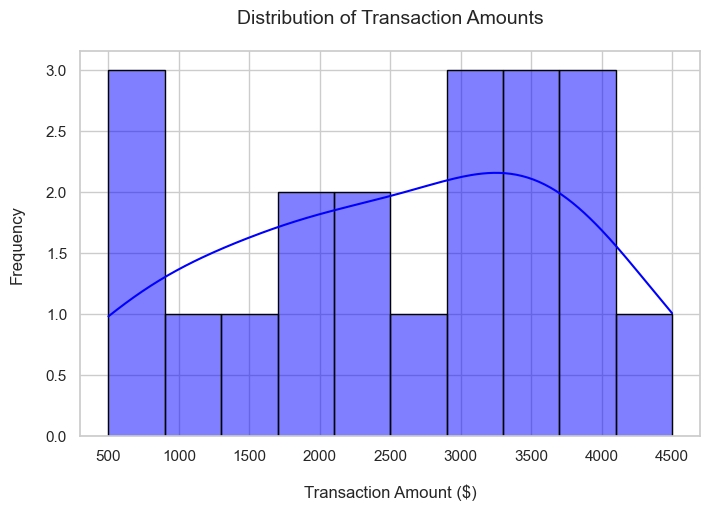

In [291]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Transaction_Amount'], bins=10, kde=True, color='blue', edgecolor='black')
plt.title("Distribution of Transaction Amounts", fontsize=14, pad=20)
plt.xlabel("Transaction Amount ($)", fontsize=12, labelpad=15)
plt.ylabel("Frequency", fontsize=12, labelpad=15)
plt.show()

### **Explanation of Common Seaborn & Matplotlib Histogram Options**

| **Option** | **What it Does** | **Key Parameters** | **Why It's Useful** |
|------------|-----------------|--------------------|----------------------|
| `bins=10` | Divides the data into **10 equal intervals (bins)**. | Integer value (e.g., `bins=20` for finer granularity). | Controls **histogram granularity**, affecting **level of detail**. |
| `kde=True` | Adds a **Kernel Density Estimate (KDE)** curve over the histogram. | `True` or `False` | Helps visualize the **distribution trend** smoothly. |
| `color='blue'` | Sets the **bar color** of the histogram. | Any valid color name or hex code (e.g., `color='red'`). | Enhances **aesthetic appeal** and **distinguishes categories**. |
| `edgecolor='black'` | Adds **black borders** around each histogram bar. | Any valid color (e.g., `edgecolor='gray'`). | Improves **bar visibility** and separation. |



# Box Plots
Suitable for interval/ratio variables

A **boxplot** (also called a **box-and-whisker plot**) is a statistical visualization that summarizes the distribution of a dataset. It provides key insights into **central tendency, variability, and outliers** by displaying five main summary statistics:

1. **Minimum** – The smallest non-outlier value in the dataset.
2. **First Quartile (Q1)** – The 25th percentile (lower quartile), below which 25% of the data falls.
3. **Median (Q2)** – The 50th percentile (middle value), which divides the dataset into two equal halves.
4. **Third Quartile (Q3)** – The 75th percentile (upper quartile), below which 75% of the data falls.
5. **Maximum** – The largest non-outlier value in the dataset.

In addition to these, boxplots **highlight outliers**, which are data points that fall significantly outside the expected range.

---

### Why Boxplots Are Good

1. **Summary of Data Distribution**: Boxplots provide a concise summary of data distribution, including median, quartiles, and outliers.
2. **Comparison Across Groups**: They make it easy to compare distributions across multiple groups, such as industries or regions.
3. **Identifying Outliers**: Boxplots clearly show outliers, which are important for understanding anomalies in financial data.
4. **Insights for Decision-Making**: Help accountants and analysts spot trends or potential issues like delayed payments or unusually high transactions.

--- 

#### Basic Example: Single Variable

<Axes: ylabel='Tax_Percentage'>

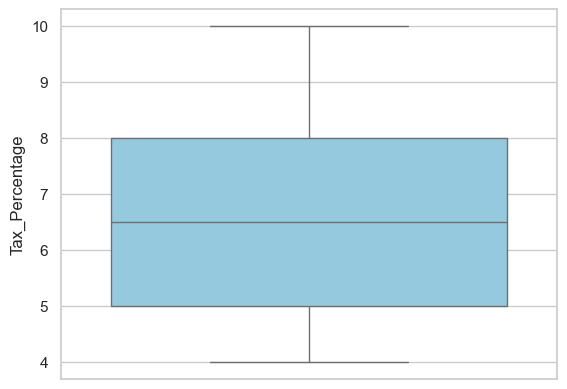

In [292]:
sns.boxplot(y=df['Tax_Percentage'], color='skyblue')

#### Boxplot – Broken Down by Categorical Variable

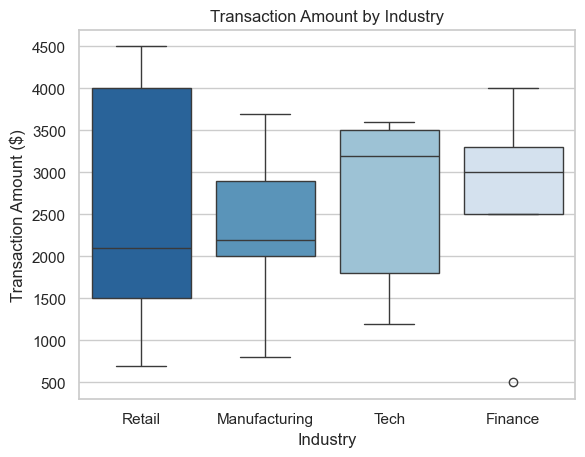

In [293]:
sns.boxplot(x='Industry', y='Transaction_Amount', hue='Industry', data=df, palette='Blues_r')
plt.title("Transaction Amount by Industry")
plt.xlabel("Industry")
plt.ylabel("Transaction Amount ($)")
plt.xticks(rotation=0)
plt.show()

### Small-Group Coding Challenge #3

#### Histogram
- Create a histogram for `Payment_Delay_Days` with a trend curve (KDE)

#### Box Plot
- Plot a boxplot for `Tax_Percentage` grouped by `Region`.
- Add a title and x-axis and y-axis labels
- Which region has the highest variability?
- Are there any outliers?

<Axes: xlabel='Payment_Delay_Days', ylabel='Count'>

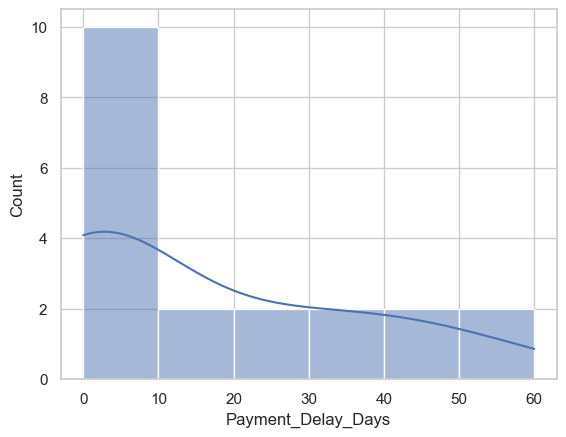

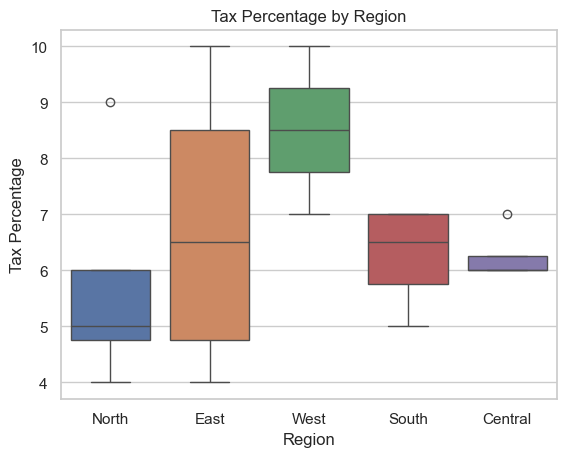

# Bar Charts

**Use Case**: Comparing discrete categories. Bar charts are one of the most commonly used visualizations in data analytics. They are used to compare categorical variables and **display frequency counts, averages, or other aggregated metrics**. 

**Relevance**: Bar charts are one of the simplest ways to compare quantities across different categories.

**Example**: Plot the number of transactions by `Invoice_Status` using `value_counts()`

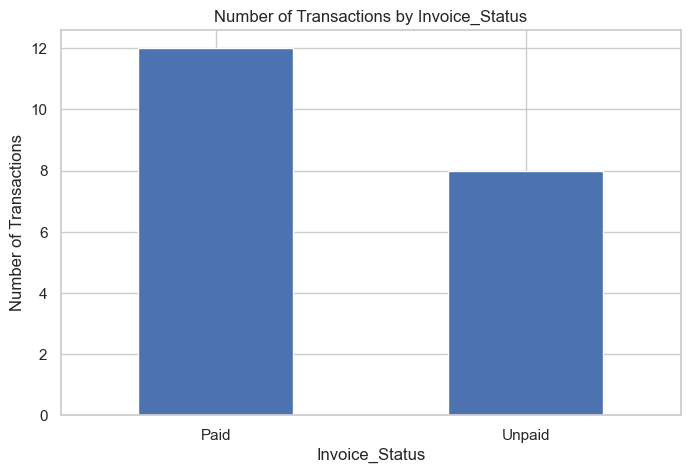

In [296]:
plt.figure(figsize=(8,5))
df['Invoice_Status'].value_counts().plot(kind='bar')
plt.title("Number of Transactions by Invoice_Status")
plt.xlabel("Invoice_Status")
plt.ylabel("Number of Transactions")
plt.xticks(rotation=0)
plt.show()

# Count Plots
A **countplot** is a type of bar chart used to visualize the **frequency** of categorical data. It displays the count of observations in each category, making it useful for **identifying patterns, trends, and anomalies** in a dataset.

**Why Use Countplots in Data Analytics?**
- **Quickly summarize categorical data** – See how often each category appears in the dataset.
- **Detect imbalances** – Identify underrepresented or overrepresented categories.
- **Find patterns in data** – Understand distributions across different groups.

**Note:** `countplot` only works for **nominal** (i.e., categorical) variables.

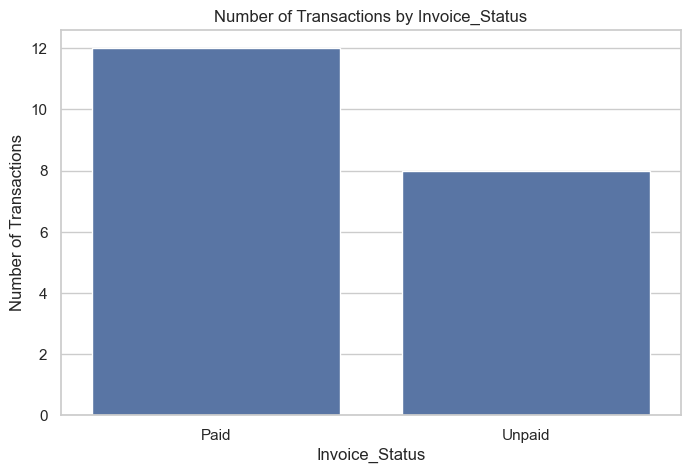

In [297]:
plt.figure(figsize=(8,5))
sns.countplot(x=df['Invoice_Status'])
plt.xlabel("Invoice_Status")
plt.ylabel("Number of Transactions")
plt.title("Number of Transactions by Invoice_Status")
plt.show()

### `plt.bar` vs. `sns.countplot` – Which One to Use?
- Use `plt.bar` when: You already precomputed counts and need a quick bar chart.
- Use `sns.countplot` when: You want cleaner visuals with automatic counting.

#### Takeaway
Both methods achieve the **same goal** (plotting transaction counts by `Invoice_Status`), but:
- `plt.bar` requires **manual pre-aggregation** (`value_counts()`).
- `sns.countplot` **automatically** counts and sorts the categories.
- `sns.countplot`'s **horizontal bars** are often more readable when dealing with long category names.

---

#### Summary



| Feature        | Bar Chart (`barplot`)       | Countplot (`countplot`)  |
|---------------|-----------------------------|-------------------------|
| **Data Input** | Categorical + numerical | Only categorical |
| **Aggregation** | Requires explicit aggregation (e.g., mean, sum) | Counts occurrences automatically |
| **Use Case** | Comparing values across categories | Counting occurrences of categories |

# Pie Charts

- A **pie chart** is a circular statistical graphic divided into slices, where each slice represents a **proportion** of a whole. It is often used to show **percentage distributions** across different categories.

- Use Cases:
  - **Easily communicate proportions** – Helps visualize how different parts contribute to a whole.
  - **Compare category sizes at a glance** – Shows which categories dominate and which are smaller.
  - **Ideal for percentage-based insights** – Useful when working with data where the sum of all categories equals 100%.

#### Example: Create a pie chart of proportion of transactions by `Region`

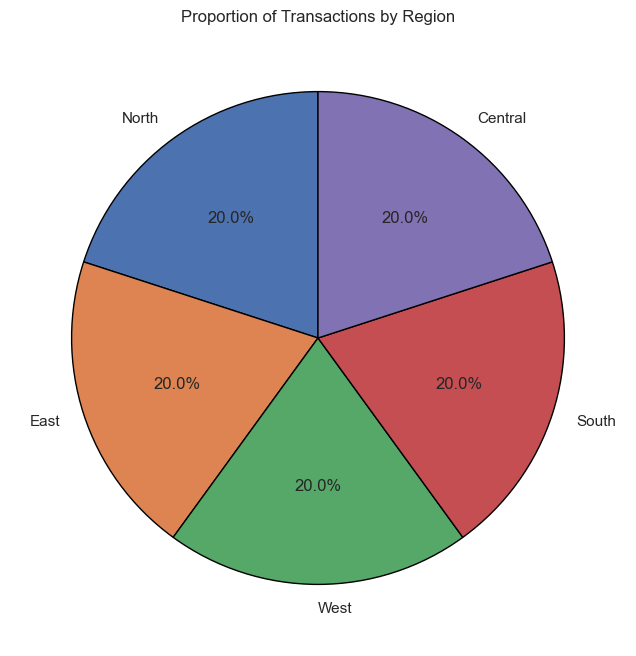

In [298]:
transactions_by_region = df['Region'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(transactions_by_region, 
    autopct='%1.1f%%',    # Show percentage values
    labels=transactions_by_region.index,  # Ensure slices are labeled
    #colors=['skyblue', 'lightcoral', 'gold', 'lightgreen', 'pink'],                
    #colors=plt.cm.Paired.colors,  # Use a visually distinct color palette
    startangle=90,        # Rotate for better visualization
    wedgeprops={'edgecolor': 'black'}  # Add black edges for clarity
    )

# Add title
plt.title("Proportion of Transactions by Region")

# Show the plot
plt.show()

### Explanation of the Pie Chart Code

- `df['Region'].value_counts()`  
  - This counts the occurrences of each unique value in the `Region` column.
  - The result is a PANDAS Series where the index contains the unique `Region` values, and the values are their respective counts.
  
- `plt.figure(figsize=(8, 8))` 
  - This adjusts the figure size to make the pie chart more readable.

- `plt.pie()`  
  - This uses Matplotlib's pie chart functionality.
  - It generates a pie chart without needing to manually extract values.

- `autopct='%1.1f%%'`  
  - This formats the pie chart slices with percentage labels.
  - `%1.1f%%` means:
    - `1.1f` → One decimal place in the percentage.
    - `%%` → Represents the percentage symbol.

- `startangle=90` → Rotates the pie chart so the first slice starts at the top (90 degrees).
- `wedgeprops={'edgecolor': 'black'}` → Adds black edges to the slices for better visual clarity.
- `plt.title("Proportion of Claims by Region")` → Adds a title to the pie chart.
- `plt.show()` → Displays the pie chart.
  
This is a good way to create a visually pleasing pie chart from a categorical column in Pandas using Matplotlib.

A basic pie chart without options can be created as follows:

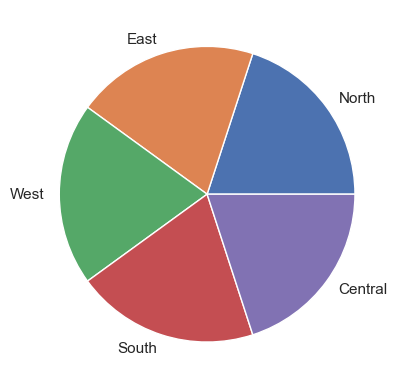

In [299]:
plt.pie(transactions_by_region, labels=transactions_by_region.index)
plt.show()

### Side Note: How to Ask ChatGPT for Plotting Code – Increasing Order of Usefulness

[Most Basic ChatGPT PROMPT]: `How can I make a pie chart in Python?`

[Basic ChatGPT PROMPT]: `How can I get a pie chart in Python from df['Region']?`

[REFINED ChatGPT PROMPT]: `"How can I create a pie chart in Python using df['Region'], ensuring that the chart includes labeled slices, percentage values, and a title?"`

[EVEN MORE REFINED ChatGPT PROMPT]: `"How can I create a pie chart using Pandas from df['Region'], including labeled slices, percentage values, a title, and visually distinct colors?"`

# Bar Chart after `groupby()`

- The `groupby()` function in Pandas is used to **split** a dataset into groups, **apply** calculations to each group, and **combine** the results. This is especially useful for **summarizing and aggregating numerical data based on categorical variables**.

- When combined with **bar charts**, grouping helps visualize differences across categories, making it easier to identify **patterns, outliers, and trends**.

---

#### Examples: 
- **Comparing average costs** – e.g., average claim replacement cost by roofing company.
- **Summarizing counts** – e.g., number of claims per city.
- **Finding highest/lowest values** – e.g., insurance adjusters with the highest repair estimates.

### Recall above that we generated this series:

```python
avg_amount_by_region = df.groupby('Region')['Transaction_Amount'].mean().sort_values(ascending=False)
```

Consequently, we can just run the plot on this series:

<Axes: xlabel='Region'>

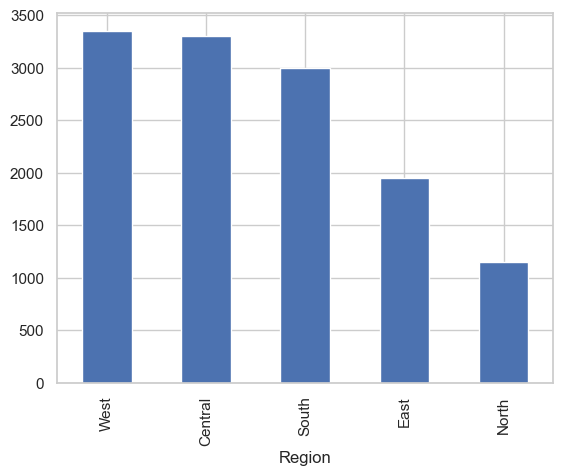

In [300]:
avg_amount_by_region.plot(kind='bar')
#plt.show() #NOT NEEDED BUT SUPPRESSES OUTPUTTING OF THE LINE<Axes: xlabel='Region'> 

# Customing the Plot
There are lots of ways we can customize the above plot. Below I use a custom color, add 'padding' below the title and around the x-axis and y-axis labels, change the font size, and add bold font. 

```python
# Get Seaborn's default blue color
seaborn_blue = sns.color_palette("deep")[0]
avg_amount_by_region = df.groupby('Region')['Transaction_Amount'].mean().sort_values(ascending=False)
plt.figure(figsize=(10,5))
avg_amount_by_region.plot(kind='bar', color=seaborn_blue)
plt.title("Average Transaction Amount by Region", fontsize=12, pad=20, fontweight='bold')
plt.xlabel("Region", labelpad=20, fontsize=11)  # Added label padding, font size
plt.ylabel("Avg Transaction Amount ($)", labelpad=20, fontsize=11)  # Added label padding, font size
plt.xticks(rotation=0, fontsize=10)
plt.ylim(0, 3500)
plt.show()
```

<br>First, I'll show the Seaborn 'deep' color palette

In [301]:
sns.color_palette('deep')

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

<br>In the following code block we are going to take the first (`[0]`) element of the above palette and call that `seaborn_blue`

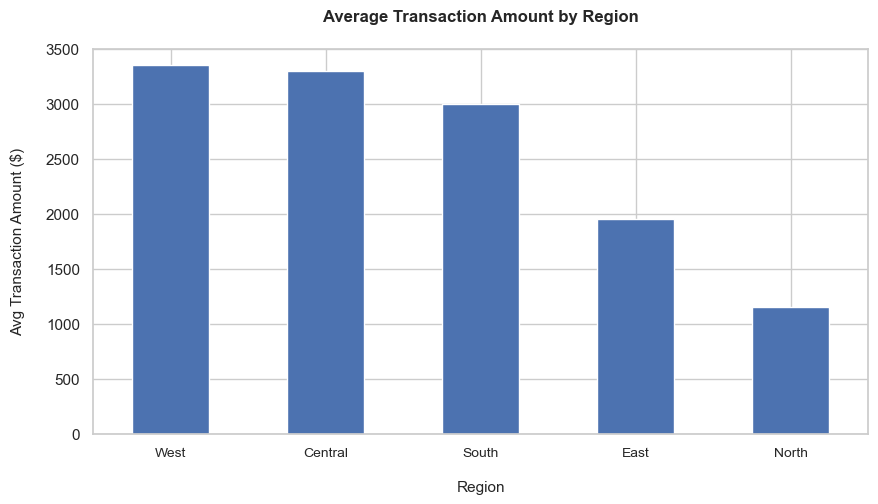

In [302]:
# Get Seaborn's default blue color
seaborn_blue = sns.color_palette("deep")[0]

avg_amount_by_region = df.groupby('Region')['Transaction_Amount'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,5))
avg_amount_by_region.plot(kind='bar', color=seaborn_blue)
plt.title("Average Transaction Amount by Region", fontsize=12, pad=20, fontweight='bold')
plt.xlabel("Region", labelpad=15, fontsize=11)  # Added label padding, font size
plt.ylabel("Avg Transaction Amount ($)", labelpad=15, fontsize=11)
plt.xticks(rotation=0, fontsize=10)
plt.ylim(0, 3500)
plt.show()

## **Breaking Down the Above Code Example**

### **Objective**
Objective: Visualize which regions have higher or lower average transaction amounts.

### **Steps**
1. **Group the Data by Region**
   - The dataset contains multiple transactions in different regions.
   - We use `.groupby('Region')` to **group all transactions in each region**.

2. **Calculate the Mean Transaction Amount** for each `Region`
   - The column `Transaction_Amount` stores the amounts for each transaction.
   - Using `.mean()` calculates the **average transaction amount** per region.

3. **Sort the Results** in descending order
   - `.sort_values(ascending=False)` sorts the companies **from highest to lowest** average transaction amount.

4. **Create a Bar Chart** to visualize the differences
   - `plt.figure(figsize=(10,5))` adjusts the figure size for readability.
   - `.plot(kind='bar')` generates a bar chart.
   - `color=seaborn_blue` sets the bar color.
   - `fontsize` sets the size of the font (we are using this for the title, x-axis label, and y-axis label)
   - `pad` adds some padding below the title
   - `labelpad` add some padding between the x-axis/y-axis labels and the plot
   - `plt.xticks(rotation=0)` sets the rotation of the x-axis labels.
   - `plt.ylim` sets the y-axis range 
   
**Purpose** - This visualization helps identify which **regions** have the highest transaction amounts.


# Modify the Above with Different Aggregation Functions

Play around with the above code by using a different `groupby()` aggregation function:
- **`count`**: Count the number of non-NA/null values.
- **`sum`**: Compute the sum of values.
- **`mean`**: Compute the mean (average) of values.
- **`median`**: Compute the median of values.
- **`min`**: Find the minimum value.
- **`max`**: Find the maximum value.
- **`std`**: Compute the standard deviation of values.
- **`var`**: Compute the variance of values.
- **`prod`**: Compute the product of values.
- **`size`**: Get the size of each group (including nulls).
- **`first`**: Return the first value in each group.
- **`last`**: Return the last value in each group.

#### Example: Using `min()`

<Axes: xlabel='Region'>

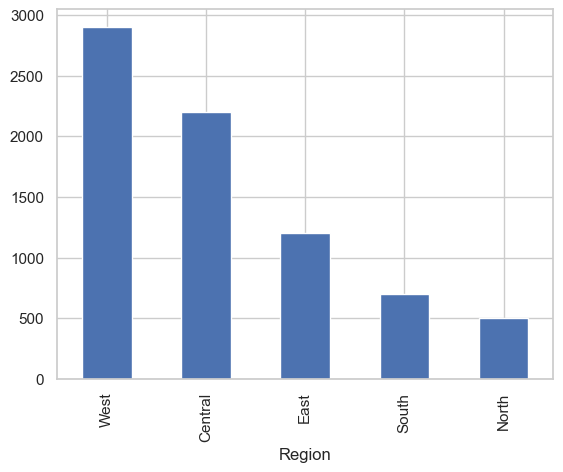

In [303]:
min_amount_by_region = df.groupby('Region')['Transaction_Amount'].min().sort_values(ascending=False)
min_amount_by_region.plot(kind='bar', color=seaborn_blue)

#### Example: Using `max()`
This is a minimal example without formatting

<Axes: xlabel='Region'>

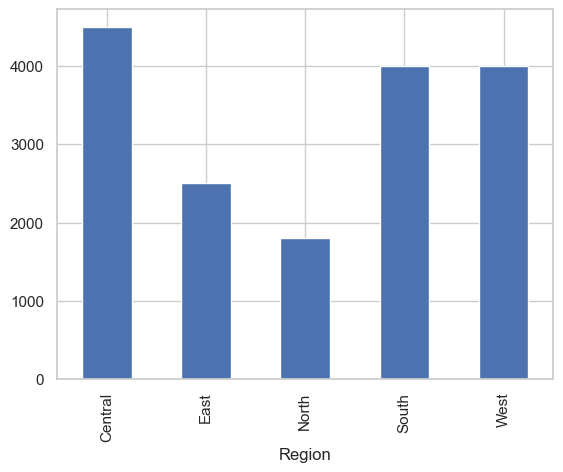

In [304]:
df.groupby('Region')['Transaction_Amount'].max().plot(kind='bar')

### Example: Using `first()`

<Axes: xlabel='Region'>

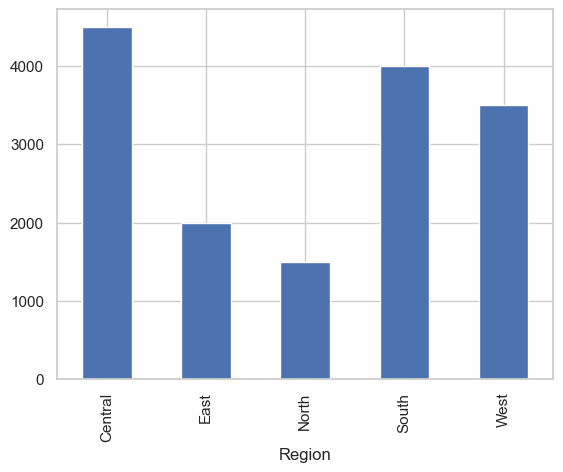

In [305]:
df.groupby('Region')['Transaction_Amount'].first().plot(kind='bar')

### Small-Group Coding Challenge #4
- Plot the total `Transaction_Amount` for each `Industry` using `sum()`

# Important Resources

Learn how to make the most of Python, Jupyter, Colaboratory, and related tools with these resources:

### Working with Notebooks in Colaboratory
- [Overview of Colaboratory](/notebooks/basic_features_overview.ipynb)  
- [Guide to Markdown](/notebooks/markdown_guide.ipynb)
- [Importing libraries and installing dependencies](/notebooks/snippets/importing_libraries.ipynb)
- [Saving and loading notebooks in GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb)

### Working with Data
- [Loading data: Drive, Sheets, and Google Cloud Storage](https://colab.research.google.com/notebooks/io.ipynb)
- [Charts: visualizing data](/notebooks/charts.ipynb)
- [Getting started with BigQuery](/notebooks/bigquery.ipynb)